In [1]:
from __future__ import print_function
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
losses = []

In [3]:
def loadImageFile(fileimage):
    f = open(fileimage, "rb")

    f.read(16)
    pixels = 28*28
    images_arr = []
    
    while True:
        try:
            img = []
            for j in range(pixels):
                pix = ord(f.read(1))
                img.append(pix / 255)
            images_arr.append(img)
        except:
            break

    f.close()
    image_sets = np.array(images_arr)
    return image_sets

In [4]:
def loadLabelFile(filelabel):
    f = open(filelabel, "rb")
    f.read(8)

    labels_arr = []

    while True:
        row = [0 for x in range(10)]
        try:
            label = ord(f.read(1))
            row[label] = 1
            labels_arr.append(row)
        except:
            break

    f.close()
    label_sets = np.array(labels_arr)
    return label_sets

In [5]:
train_images = loadImageFile("../minist/train-images-idx3-ubyte/train-images-idx3-ubyte")
train_labels = loadLabelFile("../minist/train-labels-idx1-ubyte/train-labels-idx1-ubyte")

In [6]:
test_images = loadImageFile("../minist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte")
test_labels = loadLabelFile("../minist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte")

In [7]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [19]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()
    return

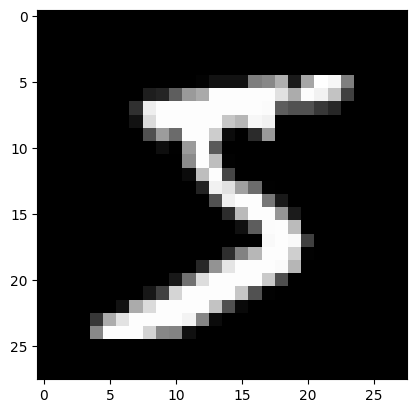

In [20]:
gen_image(train_images[0])

In [8]:
x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

y_train = train_labels
y_test = test_labels

In [9]:
# create a sequenceial neural network model in keras
model = Sequential()

In [15]:
# add a two-dimensional convolutional neuraon layer
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))

# activative function
model.add(Activation('relu'))

# batch normalization
BatchNormalization(axis=-1)

# add more hidden layers
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
BatchNormalization(axis=-1)

model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))

BatchNormalization(axis=-1)

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer
model.add(Flatten())

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))

# output of 10 values at the last layer, in the form of one-hot encoding
model.add(Dense(10))

# convert 10 floating point values to a one-hot encoding
model.add(Activation('softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                        

In [21]:
# compile and train keras NN
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train,
          batch_size=100,
          epochs=10,
          verbose=2,
          validation_split=0.2)

Epoch 1/10
480/480 - 53s - loss: 0.1755 - accuracy: 0.9458 - val_loss: 0.0466 - val_accuracy: 0.9870 - 53s/epoch - 110ms/step
Epoch 2/10
480/480 - 48s - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0393 - val_accuracy: 0.9883 - 48s/epoch - 99ms/step
Epoch 3/10
480/480 - 47s - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0353 - val_accuracy: 0.9893 - 47s/epoch - 99ms/step
Epoch 4/10
480/480 - 49s - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0297 - val_accuracy: 0.9918 - 49s/epoch - 103ms/step
Epoch 5/10
480/480 - 47s - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0321 - val_accuracy: 0.9908 - 47s/epoch - 98ms/step
Epoch 6/10
480/480 - 55s - loss: 0.0156 - accuracy: 0.9945 - val_loss: 0.0300 - val_accuracy: 0.9923 - 55s/epoch - 114ms/step
Epoch 7/10
480/480 - 53s - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0380 - val_accuracy: 0.9897 - 53s/epoch - 110ms/step
Epoch 8/10
480/480 - 71s - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0349 - val_accuracy: 0.9912 - 71s/epoch - 149ms/

In [24]:
# evaluate its accuracy
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0355 - accuracy: 0.9903
Test loss: 0.03552393615245819
Test accuracy: 0.9902999997138977


In [25]:
import os
os.getcwd()

'c:\\Users\\zuoch\\OneDrive\\Desktop\\Web Concepts and Technologies\\Hands-On-Python-Deep-Learning-for-Web-master\\Chapter3\\model'

In [36]:
path = 'c:\\Users\\zuoch\\OneDrive\\Desktop\\Web Concepts and Technologies\\Hands-On-Python-Deep-Learning-for-Web-master\\Chapter3'
os.chdir(path)

In [37]:
# save the model, make predictions for user input through the web portal
# split model into model sturcture and model weights

os.mkdir("output")
model.save("output/model.h5")
model.save_weights("output/weights.h5")

c:\Users\zuoch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
model_json = model.to_json()
with open("output/model.json", "w") as json_file:
    json_file.write(model_json)